# Problem 41 c+d

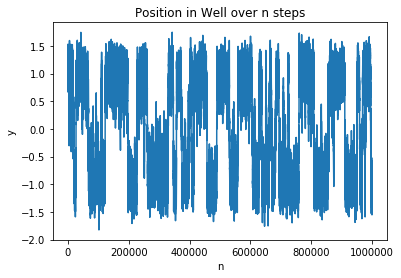

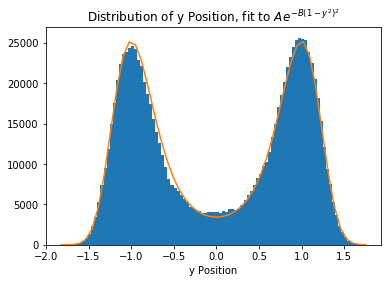

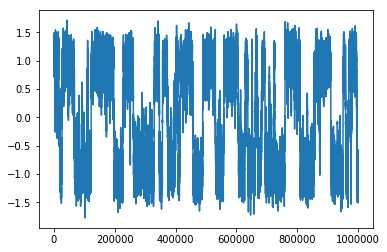

613

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

def step(y0, alpha, E):
    #given y(n), return y(n+1)
    return y0+alpha*E*y0*(1-y0**2)+np.sqrt(alpha/2)*np.random.normal()

def P(x,A0,A1):
    return A0*np.exp(-A1*(1-x**2)**2)

def plot(alpha,E,steps):
    #Need E to be small
    y_n = np.zeros(steps)
    y_n[0] = 1
    for n in range(len(y_n)-1):
        y_n[n+1] = step(y_n[n], alpha,E)
    plt.plot(range(len(y_n)), y_n)
    plt.ylabel("y")
    plt.xlabel("n")
    plt.title("Position in Well over n steps")
    plt.show()
    
    #Plot distribution of y_n
    bin_values, bins, c = plt.hist(y_n,bins=100)
    
    bin_mid = 0.5*(bins[1:] + bins[:-1])
    #should follow e^(-1/kT*V(y))
    parameters, cov = curve_fit(P, bin_mid, bin_values)
    xval = np.linspace(bins[0], bins[-1])
    plt.plot(xval, P(xval, parameters[0],parameters[1]))
    plt.xlabel("y Position")
    plt.title("Distribution of y Position, fit to $Ae^{-B(1-y^2)^2}$")
    plt.show()
    
    #Count number of times it transitions
    #First smooth the data
    smoothed_y_n = savgol_filter(y_n,11,0)
    plt.plot(range(len(smoothed_y_n)),smoothed_y_n)
    #plt.xlim(0,min(len(y_n),50000))
    plt.show()
    #Now count how many times smoothed_y_n crosses 0
    return ((smoothed_y_n[:-1] * smoothed_y_n[1:]) < 0).sum() 
    
    
plot(alpha=.001,E=2,steps=1000000)

## Part C: $\alpha$ is small enough when the motion consistently reaches both minima at y=$\pm$1
## Part D: the distribution of y positions fits the Boltzmann distribution, as shown above

In [ ]:
transitions = []
for k in range(1,100):
    transitions.append(plot(.001,1*k*0.1,1000000))

## Approximating the number of transitions as the number of times the y position crosses zero after smoothing, transitions were counted for walks with E=.1 to 10, $\alpha$=.001.

## Plotting the number of transitions vs E (below) gives a roughly exponential decay, consistent with Arrhenius's law`

Text(0.5,0,'E')

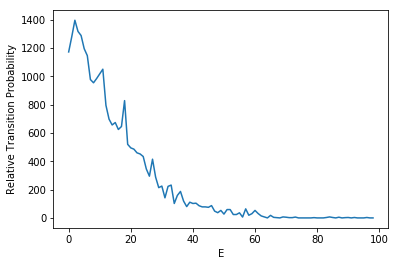

In [198]:
plt.plot(transitions)
plt.ylabel("Relative Transition Probability")
plt.xlabel("E")
#plt.yscale('log')
